### Speed Comparison of an FIR LPF vs. IIR LPF

- Desired attenuation level of IIR is matched to the FIR's level ($-60 dB$)
- Filtering *superposition_signal* with the *FIR* filter took $3.2$ seconds
- Filtering the same signal with the *IIR* filter took $0.6$ seconds
- IIR is faster than FIR (less number of taps)

Next example: [/examples/lti_filters/fir/lpf.ipynb](https://github.com/serhatsoyer/py4DSP/blob/main/examples/lti_filters/fir/lpf.ipynb)

In [1]:
import sys
sys.path.insert(0, '../../') # To be able to reach functions
from functions import fft, lti
from scipy import signal
import time as timer # To be able to measure execution time

In [2]:
num_of_coeffs = 80 # Number of coefficients, i.e. the filter order + 1
cutoff_freqs = [.5]
numerator_coeffs_fir = signal.firwin(num_of_coeffs, cutoff_freqs) # FIR (LPF by default)
lti.equation(numerator_coeffs_fir)

<IPython.core.display.Latex object>

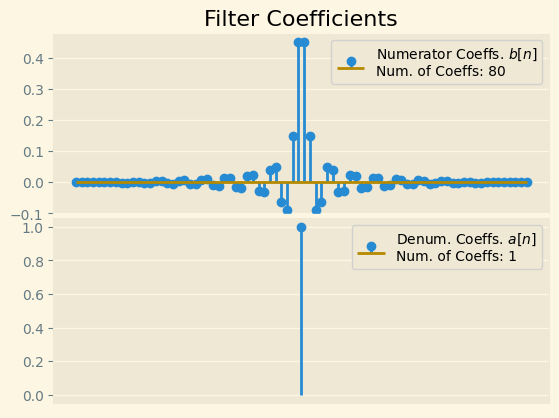

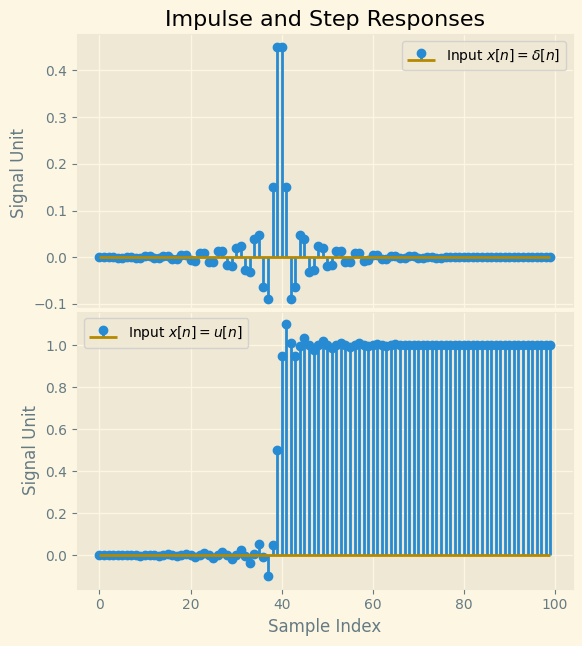

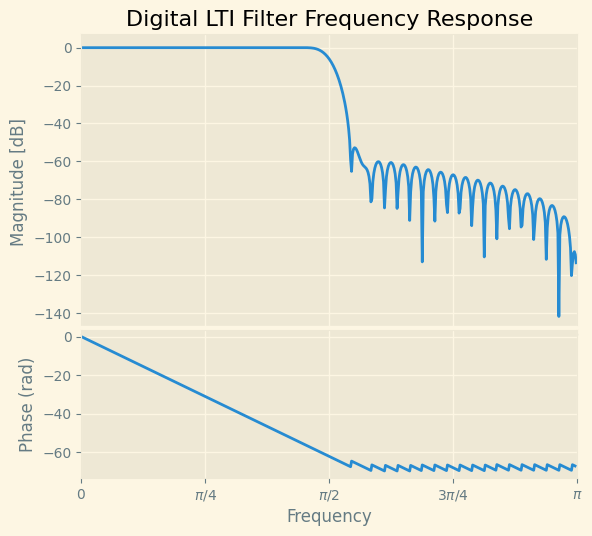

In [3]:
lti.plot_filter_coefficients(numerator_coeffs_fir)
lti.plot_impulse_and_step_responses(numerator_coeffs_fir)
lti.bode(numerator_coeffs_fir)

In [3]:
pass_freqs = [.45]
stop_freqs = [.55]
pass_loss_dB = 1
stop_loss_dB = 60
numerator_coeffs_iir, denum_coeffs_iir = signal.iirdesign(pass_freqs, stop_freqs, pass_loss_dB, stop_loss_dB)
lti.equation(numerator_coeffs_iir, denum_coeffs_iir)

<IPython.core.display.Latex object>

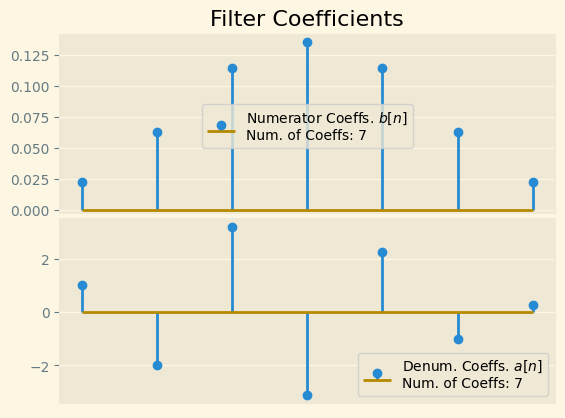

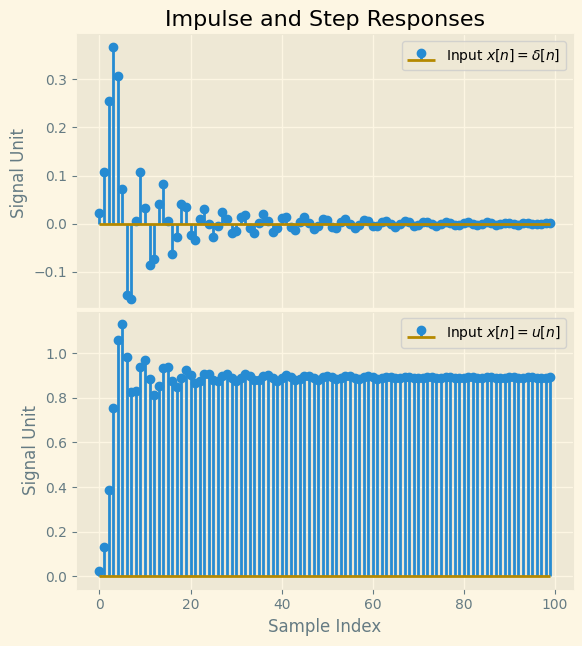

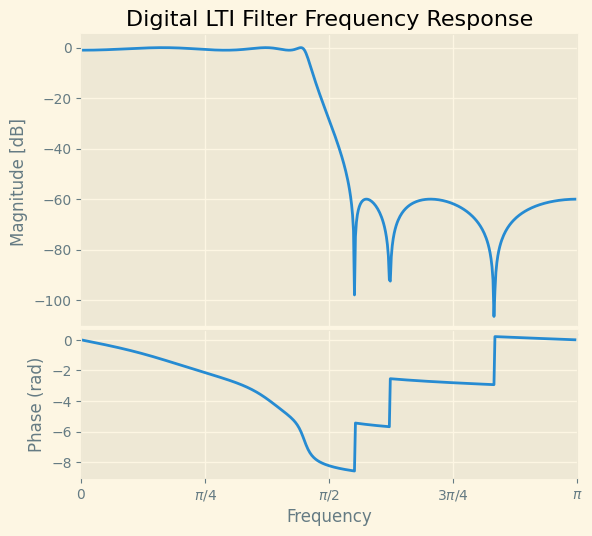

In [5]:
lti.plot_filter_coefficients(numerator_coeffs_iir, denum_coeffs_iir)
lti.plot_impulse_and_step_responses(numerator_coeffs_iir, denum_coeffs_iir)
lti.bode(numerator_coeffs_iir, denum_coeffs_iir)

In [6]:
first_time = 0 # s
last_time = 600000 # s
samp_freq = 100 # Hz

time = fft.get_time(first_time, last_time, samp_freq) # s

low_freq = 12 # Hz
cutoff_freq = 25 # Hz
high_freq = 38 # Hz

common_amplitude = 1
common_phase = 0
common_offset = 0

signal_low_freq = fft.get_signal(low_freq, common_amplitude, common_phase, common_offset, time)
signal_cutoff_freq = fft.get_signal(cutoff_freq, common_amplitude, common_phase, common_offset, time)
signal_high_freq = fft.get_signal(high_freq, common_amplitude, common_phase, common_offset, time)

superposition_signal = signal_low_freq + signal_cutoff_freq + signal_high_freq

In [7]:
start_time_fir = timer.time()
filtered_signal = signal.lfilter(numerator_coeffs_fir, [1], superposition_signal)
end_time_fir = timer.time()
print(end_time_fir - start_time_fir)

3.182724952697754


In [8]:
start_time_iir = timer.time()
filtered_signal = signal.lfilter(numerator_coeffs_iir, denum_coeffs_iir, superposition_signal)
end_time_iir = timer.time()
print(end_time_iir - start_time_iir)

0.5835869312286377


Next example: [/examples/lti_filters/fir/lpf.ipynb](https://github.com/serhatsoyer/py4DSP/blob/main/examples/lti_filters/fir/lpf.ipynb)